In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_feather('D:/big-datasets/internship-telkom/eda-tiket-no-missing.ftr')
df

,reportdate,is_gamas,emosi,datel,cwitel,reg,speed_id,lcat,bisa_browsing,gangguan_v2
0,2021-06-19 12:30:31,0,Ramah,Nunukan,47,6,3M,Residensial,0,2P / 3P Mati Total
1,2021-05-24 14:32:10,1,Ramah,Balikpapan,45,6,10M,Prime Cluster,0,Tidak Bisa Koneksi
2,2021-04-04 11:27:17,0,Ramah,Jambi,6,1,10M,Residensial,0,2P / 3P Mati Total
3,2021-06-26 21:09:49,0,Ramah,Kujang,19,2,20M,Prime Cluster,1,Lambat
4,2021-06-15 11:02:32,0,Marah,Blitar,35,5,20M,Residensial,1,Lambat
...,...,...,...,...,...,...,...,...,...,...
2632496,2021-01-04 12:21:16,0,Marah,Sumedang,23,3,20M,Prime Cluster,0,2P / 3P Mati Total
2632497,2021-02-18 09:56:08,0,Marah,Nganjuk,35,5,10M,Residensial,1,Lambat
2632498,2021-05-29 08:31:46,0,Ramah,Garut,24,3,20M,Residensial,0,2P / 3P Mati Total
2632499,2021-05-04 08:22:38,0,Marah,Surabaya selatan,38,5,30M,Residensial,1,Lambat


In [3]:
def emosi_summary_jam():
    ex = df.copy()
    # 0-6
    ramah_06 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_06 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 0) & (ex['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 6-12
    ramah_612 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 6) & (ex['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_612 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 6) & (ex['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 12-18
    ramah_1218 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 12) & (ex['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_1218 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 12) & (ex['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 18-23
    ramah_1823 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 18) & (ex['reportdate'].dt.hour <= 23)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_1823 = round(ex['emosi'][(ex['reportdate'].dt.hour >= 18) & (ex['reportdate'].dt.hour <= 23)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']

    # print text
    text = f'''
    Pukul 00:00 - 06:00
    Persentase Respon Ramah: {ramah_06}%
    Persentase Respon Marah: {marah_06}%

    Pukul 06:00 - 12:00
    Persentase Respon Ramah: {ramah_612}%
    Persentase Respon Marah: {marah_612}%

    Pukul 12:00 - 18:00
    Persentase Respon Ramah: {ramah_1218}%
    Persentase Respon Marah: {marah_1218}%

    Pukul 18:00 - 24:00
    Persentase Respon Ramah: {ramah_1823}%
    Persentase Respon Marah: {marah_1823}%
    '''
    yield text

In [4]:
ramah_06 = round(df['emosi'][(df['reportdate'].dt.hour >= 0) & (df['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
marah_06 = round(df['emosi'][(df['reportdate'].dt.hour >= 0) & (df['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']

In [5]:
d = pd.DataFrame(columns=['jam', 'marah_perc'])

In [6]:
d['jam'] = ['0-6', '6-12', '12-18', '18-24']

In [7]:
d

,jam,marah_perc
0,0-6,NaN
1,6-12,NaN
2,12-18,NaN
3,18-24,NaN


In [8]:
dictt = {}
dictt['0-6'] = 2

In [9]:
dictt

{'0-6': 2}

In [10]:
# 0-6
ramah_06 = round(df['emosi'][(df['reportdate'].dt.hour >= 0) & (df['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
marah_06 = round(df['emosi'][(df['reportdate'].dt.hour >= 0) & (df['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
# 6-12
ramah_612 = round(df['emosi'][(df['reportdate'].dt.hour >= 6) & (df['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
marah_612 = round(df['emosi'][(df['reportdate'].dt.hour >= 6) & (df['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
# 12-18
ramah_1218 = round(df['emosi'][(df['reportdate'].dt.hour >= 12) & (df['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
marah_1218 = round(df['emosi'][(df['reportdate'].dt.hour >= 12) & (df['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
# 18-23
ramah_1824 = round(df['emosi'][(df['reportdate'].dt.hour >= 18) & (df['reportdate'].dt.hour < 24)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
marah_1824 = round(df['emosi'][(df['reportdate'].dt.hour >= 18) & (df['reportdate'].dt.hour < 24)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']

In [11]:
marah_dict = {}
marah_dict['0-6'] = marah_06
marah_dict['6-12'] = marah_612
marah_dict['12-18'] = marah_1218
marah_dict['18-24'] = marah_1824

In [12]:
marah_dict

{'0-6': 35.33, '6-12': 34.19, '12-18': 34.89, '18-24': 36.66}

In [13]:
plot_all = pd.DataFrame(list(marah_dict.items()), columns = ['jam', 'marah_perc'])
plot_all = plot_all.sort_values(by='marah_perc', ascending=True)

In [14]:
plot_all

,jam,marah_perc
1,6-12,34.19
2,12-18,34.89
0,0-6,35.33
3,18-24,36.66


In [15]:
plot_all.sort_index()

,jam,marah_perc
0,0-6,35.33
1,6-12,34.19
2,12-18,34.89
3,18-24,36.66


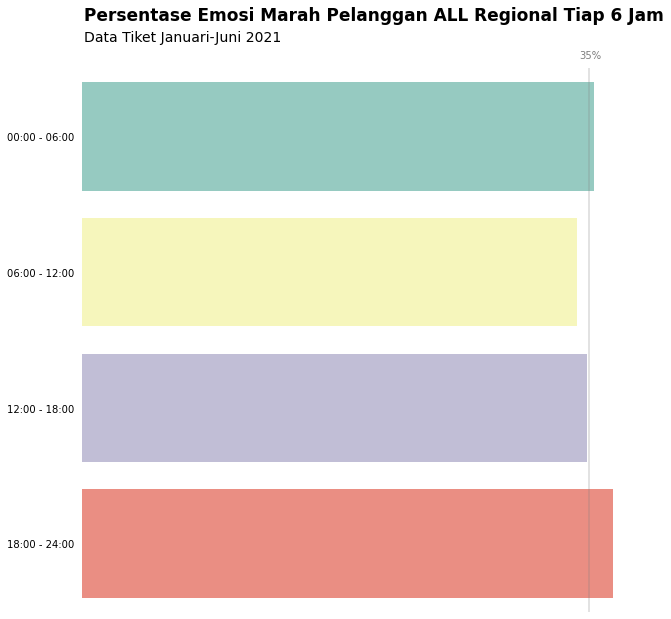

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.barplot(ax=ax, data=plot_all.sort_index(),
            x='marah_perc', y='jam',
            orient='h', palette='Set3')

ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(['00:00 - 06:00', '06:00 - 12:00', '12:00 - 18:00', '18:00 - 24:00'])
ax.set_xticks([])
ax.text(x=34.3, y=-0.57, s='35%', alpha=0.5)

ax.tick_params(axis='x', colors='grey')
ax.tick_params(top=False, left=False)

for loc in ['top', 'right', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)
    
ax.axvline(x=35, color='grey', alpha=0.3)
ax.text(x=0.2, y=-0.85, s='Persentase Emosi Marah Pelanggan ALL Regional Tiap 6 Jam', weight='bold', size=17)
ax.text(x=0.2, y=-0.7, s='Data Tiket Januari-Juni 2021', size=14)

plt.show();

In [17]:
def make_df_jam(reg):
    df2 = df[df['reg'] == reg]
    
    # 0-6
    ramah_06 = round(df2['emosi'][(df2['reportdate'].dt.hour >= 0) & (df2['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_06 = round(df2['emosi'][(df2['reportdate'].dt.hour >= 0) & (df2['reportdate'].dt.hour < 6)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 6-12
    ramah_612 = round(df2['emosi'][(df2['reportdate'].dt.hour >= 6) & (df2['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_612 = round(df2['emosi'][(df2['reportdate'].dt.hour >= 6) & (df2['reportdate'].dt.hour < 12)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 12-18
    ramah_1218 = round(df2['emosi'][(df2['reportdate'].dt.hour >= 12) & (df2['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_1218 = round(df2['emosi'][(df2['reportdate'].dt.hour >= 12) & (df2['reportdate'].dt.hour < 18)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    # 18-23
    ramah_1824 = round(df2['emosi'][(df2['reportdate'].dt.hour >= 18) & (df2['reportdate'].dt.hour < 24)].value_counts(normalize=True) * 100, 2).to_dict()['Ramah']
    marah_1824 = round(df2['emosi'][(df2['reportdate'].dt.hour >= 18) & (df2['reportdate'].dt.hour < 24)].value_counts(normalize=True) * 100, 2).to_dict()['Marah']
    
    marah_dict = {}
    marah_dict['00:00 - 06:00'] = marah_06
    marah_dict['06:00 - 12:00'] = marah_612
    marah_dict['12:00 - 18:00'] = marah_1218
    marah_dict['18:00 - 24:00'] = marah_1824
    
    plot = pd.DataFrame(list(marah_dict.items()), columns = ['jam', 'marah_perc'])
    plot = plot.sort_index()
    plot['reg'] = reg
    
    return plot

In [18]:
start_time = time.time()

plot1 = make_df_jam(reg=1)
plot2 = make_df_jam(reg=2)
plot3 = make_df_jam(reg=3)
plot4 = make_df_jam(reg=4)
plot5 = make_df_jam(reg=5)
plot6 = make_df_jam(reg=6)
plot7 = make_df_jam(reg=7)

df_conc = pd.concat([plot1, plot2, plot3, plot4, plot5, plot6, plot7])

print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 7.173792600631714


In [19]:
df_conc = df_conc.reset_index(drop=True)

In [20]:
df_conc

,jam,marah_perc,reg
0,00:00 - 06:00,31.66,1
1,06:00 - 12:00,32.06,1
2,12:00 - 18:00,32.95,1
3,18:00 - 24:00,32.97,1
4,00:00 - 06:00,38.32,2
5,06:00 - 12:00,36.33,2
6,12:00 - 18:00,37.48,2
7,18:00 - 24:00,39.21,2
8,00:00 - 06:00,36.32,3
9,06:00 - 12:00,33.04,3


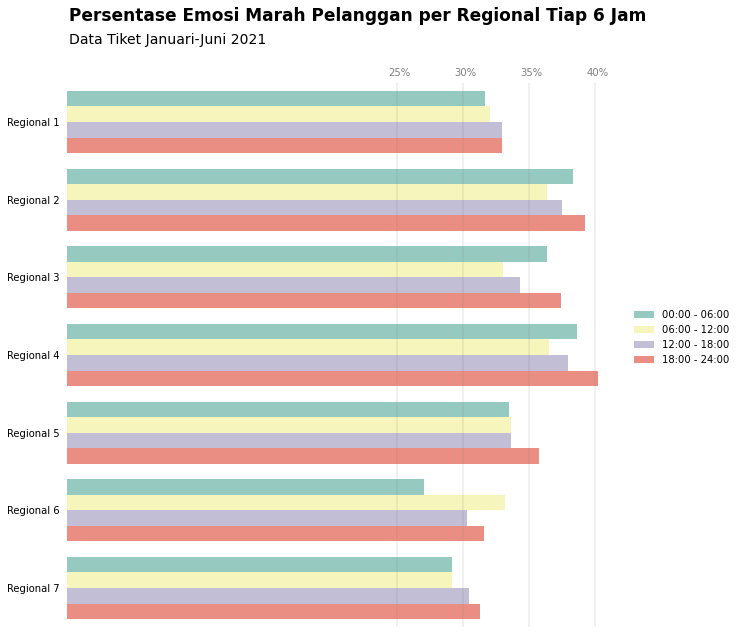

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.barplot(ax=ax, data=df_conc.sort_index(),
            x='marah_perc', y='reg', hue='jam',
            orient='h', palette='Set3')

ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(['Regional 1', 'Regional 2', 'Regional 3', 'Regional 4', 'Regional 5', 'Regional 6', 'Regional 7'])
ax.set_xticks([])
ax.text(x=24.3, y=-0.6, s='25%', alpha=0.5)
ax.text(x=29.3, y=-0.6, s='30%', alpha=0.5)
ax.text(x=34.3, y=-0.6, s='35%', alpha=0.5)
ax.text(x=39.3, y=-0.6, s='40%', alpha=0.5)

ax.tick_params(axis='x', colors='grey')
ax.tick_params(top=False, left=False)

for loc in ['top', 'right', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)
    
ax.legend(frameon=False, bbox_to_anchor=(1, 0.6))
ax.axvline(x=25, color='grey', alpha=0.15)
ax.axvline(x=30, color='grey', alpha=0.15)
ax.axvline(x=35, color='grey', alpha=0.15)
ax.axvline(x=40, color='grey', alpha=0.15)

ax.text(x=0.2, y=-1.3, s='Persentase Emosi Marah Pelanggan per Regional Tiap 6 Jam', weight='bold', size=17)
ax.text(x=0.2, y=-1, s='Data Tiket Januari-Juni 2021', size=14)

plt.show();

# -----
## Checkpoint
# -----

In [22]:
df_conc

,jam,marah_perc,reg
0,00:00 - 06:00,31.66,1
1,06:00 - 12:00,32.06,1
2,12:00 - 18:00,32.95,1
3,18:00 - 24:00,32.97,1
4,00:00 - 06:00,38.32,2
5,06:00 - 12:00,36.33,2
6,12:00 - 18:00,37.48,2
7,18:00 - 24:00,39.21,2
8,00:00 - 06:00,36.32,3
9,06:00 - 12:00,33.04,3


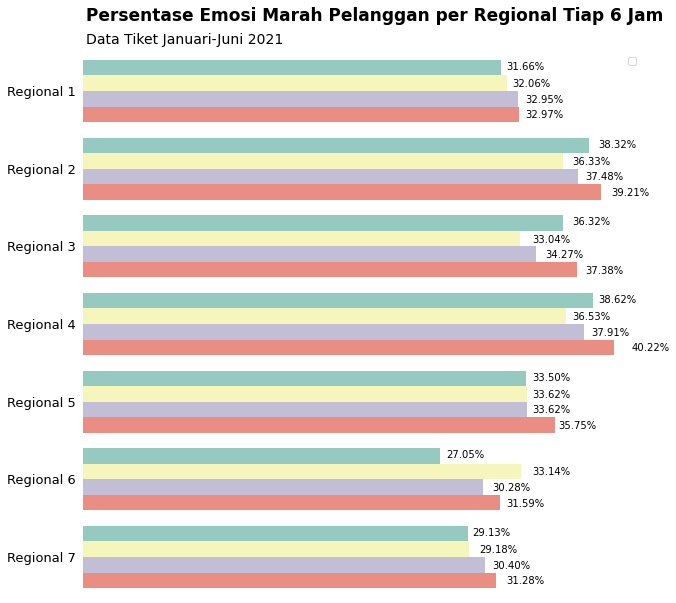

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
sns.barplot(ax=ax, data=df_conc.sort_index(),
            x='marah_perc', y='reg', hue='jam',
            orient='h', palette='Set3')

ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(['Regional 1', 'Regional 2', 'Regional 3', 'Regional 4', 'Regional 5', 'Regional 6', 'Regional 7'],
                   fontsize=13)
ax.set_xticks([])
# ax.text(x=24.3, y=-0.6, s='25%', alpha=0.5)
# ax.text(x=29.3, y=-0.6, s='30%', alpha=0.5)
# ax.text(x=34.3, y=-0.6, s='35%', alpha=0.5)
# ax.text(x=39.3, y=-0.6, s='40%', alpha=0.5)

ax.tick_params(axis='x', colors='grey')
ax.tick_params(top=False, left=False)

for loc in ['top', 'right', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)
    
# ax.legend(frameon=False, bbox_to_anchor=(1.3, 0.6))
ax.legend([])
# ax.axvline(x=25, color='grey', alpha=0.15)
# ax.axvline(x=30, color='grey', alpha=0.15)
# ax.axvline(x=35, color='grey', alpha=0.15)
# ax.axvline(x=40, color='grey', alpha=0.15)

ax.text(x=0.2, y=-0.9, s='Persentase Emosi Marah Pelanggan per Regional Tiap 6 Jam', weight='bold', size=17)
ax.text(x=0.2, y=-0.6, s='Data Tiket Januari-Juni 2021', size=14)

# 00:00 - 06:00
ax.text(x=32, y=-0.27, s='31.66%')
ax.text(x=39, y=0.73, s='38.32%')
ax.text(x=37, y=1.73, s='36.32%')
ax.text(x=39, y=2.73, s='38.62%')
ax.text(x=34, y=3.73, s='33.50%')
ax.text(x=27.5, y=4.73, s='27.05%')
ax.text(x=29.5, y=5.73, s='29.13%')

# 06:00 - 12:00
ax.text(x=32.5, y=-0.05, s='32.06%')
ax.text(x=37, y=0.95, s='36.33%')
ax.text(x=34, y=1.95, s='33.04%')
ax.text(x=37, y=2.95, s='36.53%')
ax.text(x=34, y=3.95, s='33.62%')
ax.text(x=34, y=4.95, s='33.14%')
ax.text(x=30, y=5.95, s='29.18%')

# 12:00 - 18:00
ax.text(x=33.5, y=0.15, s='32.95%')
ax.text(x=38, y=1.15, s='37.48%')
ax.text(x=35, y=2.15, s='34.27%')
ax.text(x=38.5, y=3.15, s='37.91%')
ax.text(x=34, y=4.15, s='33.62%')
ax.text(x=31, y=5.15, s='30.28%')
ax.text(x=31, y=6.15, s='30.40%')

# 18:00 - 24:00
ax.text(x=33.5, y=0.35, s='32.97%')
ax.text(x=40, y=1.35, s='39.21%')
ax.text(x=38, y=2.35, s='37.38%')
ax.text(x=41.5, y=3.35, s='40.22%')
ax.text(x=36, y=4.35, s='35.75%')
ax.text(x=32, y=5.35, s='31.59%')
ax.text(x=32, y=6.35, s='31.28%')

plt.show();

In [24]:
df_conc[df_conc['jam'] == '18:00 - 24:00']

,jam,marah_perc,reg
3,18:00 - 24:00,32.97,1
7,18:00 - 24:00,39.21,2
11,18:00 - 24:00,37.38,3
15,18:00 - 24:00,40.22,4
19,18:00 - 24:00,35.75,5
23,18:00 - 24:00,31.59,6
27,18:00 - 24:00,31.28,7


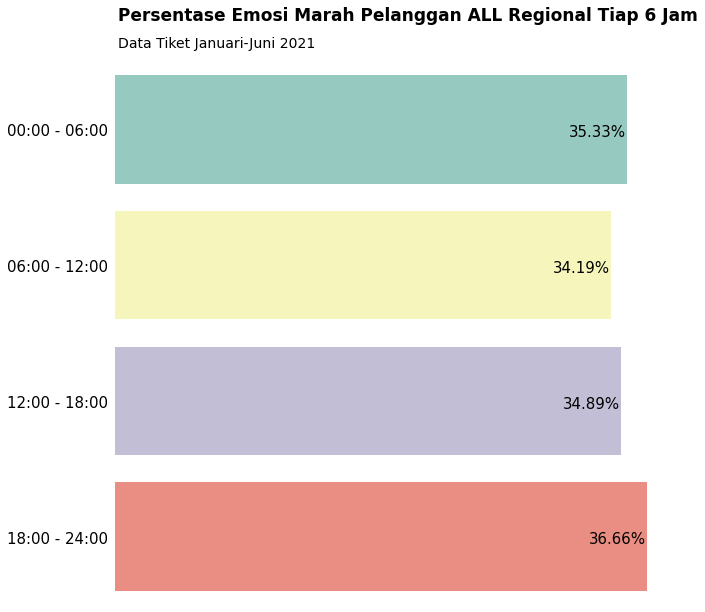

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.barplot(ax=ax, data=plot_all.sort_index(),
            x='marah_perc', y='jam',
            orient='h', palette='Set3')

ax.xaxis.tick_top()
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(['00:00 - 06:00', '06:00 - 12:00', '12:00 - 18:00', '18:00 - 24:00'],
                   fontsize=15)
ax.set_xticks([])
# ax.text(x=34.3, y=-0.57, s='35%', alpha=0.5)

ax.tick_params(axis='x', colors='grey')
ax.tick_params(top=False, left=False)

for loc in ['top', 'right', 'bottom', 'left']:
    ax.spines[loc].set_visible(False)
    
# ax.axvline(x=35, color='grey', alpha=0.3)
ax.text(x=0.2, y=-0.8, s='Persentase Emosi Marah Pelanggan ALL Regional Tiap 6 Jam', weight='bold', size=17)
ax.text(x=0.2, y=-0.6, s='Data Tiket Januari-Juni 2021', size=14)

# Annotate
ax.text(x=31.33, y=0.05, s='35.33%', size=15)
ax.text(x=30.19, y=1.05, s='34.19%', size=15)
ax.text(x=30.89, y=2.05, s='34.89%', size=15)
ax.text(x=32.66, y=3.05, s='36.66%', size=15)

plt.show();

In [26]:
plot_all

,jam,marah_perc
1,6-12,34.19
2,12-18,34.89
0,0-6,35.33
3,18-24,36.66
